In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Pre-processing : 

In [4]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


In [103]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#Delete features because high correlation between them (>0.9) : 
X_train_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

#Delete because constant values:
X_train_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)
X_train_observed_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)
X_test_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)

X_train_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)
X_train_observed_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)
X_test_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)

X_train_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)
X_train_observed_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)
X_test_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms','elevation:m'], axis = 1, inplace = True)


In [104]:
#We match the sizes of X and Y 
#We keep the measurements from every hour only 
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

#We put the dates as the indexes of the data, and we remove some dates that are not in the corresponding y data.
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)

X_train_estimated_a_matched = X_train_estimated_a.loc[intersection_index_estimated_a]
train_a_estimated_matched = train_a.loc[intersection_index_estimated_a]
X_train_observed_a_matched = X_train_observed_a.loc[intersection_index_observed_a]
train_a_observed_matched = train_a.loc[intersection_index_observed_a]

X_train_estimated_b_matched = X_train_estimated_b.loc[intersection_index_estimated_b]
train_b_estimated_matched = train_b.loc[intersection_index_estimated_b]
X_train_observed_b_matched = X_train_observed_b.loc[intersection_index_observed_b]
train_b_observed_matched = train_b.loc[intersection_index_observed_b]

X_train_estimated_c_matched = X_train_estimated_c.loc[intersection_index_estimated_c]
train_c_estimated_matched = train_c.loc[intersection_index_estimated_c]
X_train_observed_c_matched = X_train_observed_c.loc[intersection_index_observed_c]
train_c_observed_matched = train_c.loc[intersection_index_observed_c]

In [105]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx = ['dew_or_rime:idx',\
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',]

for id in idx:
    concatenated_df = pd.concat([X_train_observed_a_matched[id], X_train_estimated_a_matched[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    X_train_observed_a_matched = pd.concat([X_train_observed_a_matched, df_observed_encoded], axis =1)
    X_train_estimated_a_matched = pd.concat([X_train_estimated_a_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    X_train_observed_a_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_a_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_b_matched[id], X_train_estimated_b_matched[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    X_train_observed_b_matched = pd.concat([X_train_observed_b_matched, df_observed_encoded], axis =1)
    X_train_estimated_b_matched = pd.concat([X_train_estimated_b_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    X_train_observed_b_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_b_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_c_matched[id], X_train_estimated_c_matched[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    X_train_observed_c_matched = pd.concat([X_train_observed_c_matched, df_observed_encoded], axis =1)
    X_train_estimated_c_matched = pd.concat([X_train_estimated_c_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    X_train_observed_c_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_c_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)


In [106]:
#Missing values
X_train_estimated_a_final = X_train_estimated_a_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_a_matched['cloud_base_agl:m'].mean()})

X_train_observed_a_final = X_train_observed_a_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_a_matched['cloud_base_agl:m'].mean()})

X_test_estimated_a_final = X_test_estimated_a.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_a['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_a['cloud_base_agl:m'].mean()})


X_train_estimated_b_final = X_train_estimated_b_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_b_matched['cloud_base_agl:m'].mean()})

X_train_observed_b_final = X_train_observed_b_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_b_matched['cloud_base_agl:m'].mean()})

X_test_estimated_b_final = X_test_estimated_b.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_b['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_b['cloud_base_agl:m'].mean()})


X_train_estimated_c_final = X_train_estimated_c_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_c_matched['cloud_base_agl:m'].mean()})

X_train_observed_c_final = X_train_observed_c_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_c_matched['cloud_base_agl:m'].mean()})

X_test_estimated_c_final = X_test_estimated_c.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_c['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_c['cloud_base_agl:m'].mean()})


In [107]:
print(X_train_estimated_a_final.shape)
print(X_train_estimated_b_final.shape)
print(X_train_estimated_c_final.columns)
for column in X_train_estimated_c_final.columns : 
    if column not in X_train_estimated_b_final.columns : 
        print(column)

(4394, 43)
(3601, 43)
Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_rad:W', 'cloud_base_agl:m',
       'diffuse_rad:W', 'direct_rad:W', 'effective_cloud_cover:p',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'precip_5min:mm',
       'pressure_100m:hPa', 'prob_rime:p', 'rain_water:kgm2',
       'relative_humidity_1000hPa:p', 'snow_depth:cm', 'snow_melt_10min:mm',
       'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'dew_or_rime:idx_-1.0', 'dew_or_rime:idx_0.0',
       'dew_or_rime:idx_1.0', 'is_day:idx_0.0', 'is_day:idx_1.0',
       'is_in_shadow:idx_0.0', 'is_in_shadow:idx_1.0',
       'precip_type_5min:idx_0.0', 'precip_type_5min:idx_1.0',
       'precip_type_5min:idx_2.0', 'preci

In [108]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

list_df_final = []
for X in [X_train_estimated_a_final, X_train_observed_a_final, X_test_estimated_a_final,\
         X_train_estimated_b_final, X_train_observed_b_final, X_test_estimated_b_final,\
         X_train_estimated_c_final, X_train_observed_c_final, X_test_estimated_c_final] : 
    columns = X.columns 
    index = X.index 
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns = columns)
    X.set_index(index, inplace= True)
    list_df_final.append(X)

In [109]:
X_train_estimated_a_final = list_df_final[0]
X_train_observed_a_final = list_df_final[1]
X_test_estimated_a_final = list_df_final[2]

X_train_estimated_b_final = list_df_final[3]
X_train_observed_b_final = list_df_final[4]
X_test_estimated_b_final = list_df_final[5]

X_train_estimated_c_final = list_df_final[6]
X_train_observed_c_final = list_df_final[7]
X_test_estimated_c_final = list_df_final[8]

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,precip_5min:mm,pressure_100m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,dew_or_rime:idx_-1.0,dew_or_rime:idx_0.0,dew_or_rime:idx_1.0,is_day:idx_0.0,is_day:idx_1.0,is_in_shadow:idx_0.0,is_in_shadow:idx_1.0,precip_type_5min:idx_0.0,precip_type_5min:idx_1.0,precip_type_5min:idx_2.0,precip_type_5min:idx_3.0,precip_type_5min:idx_5.0,precip_type_5min:idx_6.0
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,0.396485,0.430451,0.259343,0.092734,0.141037,0.077196,0.048673,0.683182,0.033606,0.010556,0.042032,0.015769,0.021903,0.011724,0.544670,0.005663,0.007909,0.651269,0.043413,0.004307,0.024053,0.496098,0.430884,0.036059,0.573438,0.737253,0.487272,0.296429,0.415229,0.514319,0.020255,0.949704,0.030041,0.652025,0.347975,0.304506,0.695494,0.955621,0.024579,0.007965,0.011834,0.0,0.0
std,0.193878,0.185723,0.175411,0.202978,0.147475,0.154351,0.149421,0.358845,0.108531,0.059171,0.110891,0.073114,0.086820,0.061471,0.203366,0.048592,0.057033,0.179075,0.150516,0.042457,0.061321,0.284768,0.238270,0.093897,0.177220,0.363183,0.251631,0.173035,0.176943,0.146642,0.140891,0.218586,0.170714,0.476381,0.476381,0.460244,0.460244,0.205957,0.154853,0.088902,0.108154,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.256410,0.308642,0.127954,0.000000,0.047296,0.000000,0.000000,0.421000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398639,0.000000,0.000000,0.528662,0.000000,0.000000,0.000000,0.253359,0.236910,0.000000,0.461831,0.479250,0.281671,0.153846,0.289017,0.421488,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.371795,0.413581,0.259343,0.000000,0.101364,0.000000,0.000000,0.851000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547278,0.000000,0.000000,0.677707,0.000000,0.000000,0.000000,0.508327,0.438483,0.000000,0.572519,0.980000,0.507360,0.269231,0.398844,0.520661,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.525641,0.549383,0.314297,0.052654,0.151457,0.078057,0.001846,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687679,0.000000,0.000000,0.788535,0.000000,0.000000,0.031250,0.739006,0.597765,0.000000,0.690839,1.000000,0.700387,0.403846,0.502890,0.603306,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0

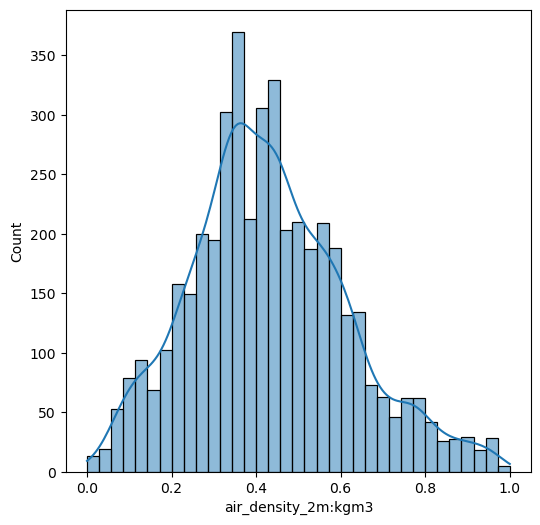

In [110]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X_train_estimated_a_final['air_density_2m:kgm3']
sns.histplot(data=f, kde=True)

X_train_estimated_a_final.describe()

In [111]:
transformations = [['absolute_humidity_2m:gm3', 'f'],
 ['air_density_2m:kgm3', '1/f'],
 ['ceiling_height_agl:m', 'f'],
 ['clear_sky_rad:W', 'f'],
 ['cloud_base_agl:m', 'logfc'],
 ['dew_or_rime:idx', 'hot'],
 ['effective_cloud_cover:p', 'f^2'],
 ['elevation:m', 'constant'],
 ['fresh_snow_12h:cm', 'loglogf ou rien'],
 ['fresh_snow_1h:cm', 'loglogf ou rien'],
 ['fresh_snow_24h:cm', 'loglogf ou rien'],
 ['fresh_snow_3h:cm', 'loglogf ou rien'],
 ['fresh_snow_6h:cm', 'loglogf ou rien'],
 ['is_day:idx', 'hot'],
 ['is_in_shadow:idx', 'hot'],
 ['precip_5min:mm', 'loglogf ou rien'],
 ['precip_type_5min:idx', 'hot'],
 ['pressure_100m:hPa', 'rien'],
 ['prob_rime:p', 'loglogf ou rien'],
 ['rain_water:kgm2', 'one hot à faire !'],
 ['relative_humidity_1000hPa:p', ''],
 ['snow_density:kgm3', 'constant'],
 ['snow_depth:cm', 'loglogf ou rien'],
 ['snow_drift:idx', 'hot'],
 ['snow_melt_10min:mm', 'loglogf ou rien'],
 ['snow_water:kgm2', 'loglogf ou rien'],
 ['sun_azimuth:d', 'f ou f^2'],
 ['sun_elevation:d', 'f ou f^2'],
 ['super_cooled_liquid_water:kgm2', 'loglogf ou rien'],
 ['t_1000hPa:K', 'f^2'],
 ['total_cloud_cover:p', 'f^2 ou rien'],
 ['visibility:m', 'f'],
 ['wind_speed_10m:ms', 'f ou logfc'],
 ['wind_speed_u_10m:ms', 'f ou logfc'],
 ['wind_speed_v_10m:ms', 'f'],
 ['wind_speed_w_1000hPa:ms', 'hot']]

In [112]:
for X in [X_train_estimated_a_final, X_train_observed_a_final, X_test_estimated_a_final,\
         X_train_estimated_b_final, X_train_observed_b_final, X_test_estimated_b_final,\
         X_train_estimated_c_final, X_train_observed_c_final, X_test_estimated_c_final] : 
    for feature, function in transformations:
        if function == '1/f':
            X[feature] = 1/(X[feature]+.5)
        if function == 'logfc':
            X[feature] = np.log(X[feature] + (X[feature].quantile(.25)/X[feature].quantile(.75))**2 )
        if function == 'f^2':
            X[feature] = (X[feature])**2
        if function == 'logf':
            X[feature] = np.log(X[feature]+.001)
        if function == 'loglogf':
            X[feature] = np.log(np.log(X[feature]+1)+1)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,precip_5min:mm,pressure_100m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,dew_or_rime:idx_-1.0,dew_or_rime:idx_0.0,dew_or_rime:idx_1.0,is_day:idx_0.0,is_day:idx_1.0,is_in_shadow:idx_0.0,is_in_shadow:idx_1.0,precip_type_5min:idx_0.0,precip_type_5min:idx_1.0,precip_type_5min:idx_2.0,precip_type_5min:idx_3.0,precip_type_5min:idx_5.0,precip_type_5min:idx_6.0
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,0.396485,1.119031,0.259343,0.092734,-1.568455,0.077196,0.048673,0.595478,0.033606,0.010556,0.042032,0.015769,0.021903,0.011724,0.544670,0.005663,0.007909,0.651269,0.043413,0.004307,0.024053,0.496098,0.430884,0.036059,0.360231,0.737253,0.487272,0.296429,0.415229,0.514319,0.020255,0.949704,0.030041,0.652025,0.347975,0.304506,0.695494,0.955621,0.024579,0.007965,0.011834,0.0,0.0
std,0.193878,0.230443,0.175411,0.202978,0.488740,0.154351,0.149421,0.401537,0.108531,0.059171,0.110891,0.073114,0.086820,0.061471,0.203366,0.048592,0.057033,0.179075,0.150516,0.042457,0.061321,0.284768,0.238270,0.093897,0.201043,0.363183,0.251631,0.173035,0.176943,0.146642,0.140891,0.218586,0.170714,0.476381,0.476381,0.460244,0.460244,0.205957,0.154853,0.088902,0.108154,0.0,0.0
min,0.000000,0.666666,0.000000,0.000000,-2.327771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.256410,0.952941,0.127954,0.000000,-1.932344,0.000000,0.000000,0.177241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398639,0.000000,0.000000,0.528662,0.000000,0.000000,0.000000,0.253359,0.236910,0.000000,0.213288,0.479250,0.281671,0.153846,0.289017,0.421488,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.371795,1.094594,0.259343,0.000000,-1.615070,0.000000,0.000000,0.724201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547278,0.000000,0.000000,0.677707,0.000000,0.000000,0.000000,0.508327,0.438483,0.000000,0.327778,0.980000,0.507360,0.269231,0.398844,0.520661,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.525641,1.236641,0.314297,0.052654,-1.390424,0.078057,0.001846,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687679,0.000000,0.000000,0.788535,0.000000,0.000000,0.031250,0.739006,0.597765,0.000000,0.477258,1.000000,0.700387,0.403846,0.502890,0.603306,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,2.000000,1.000000,1.000000,0.093047,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

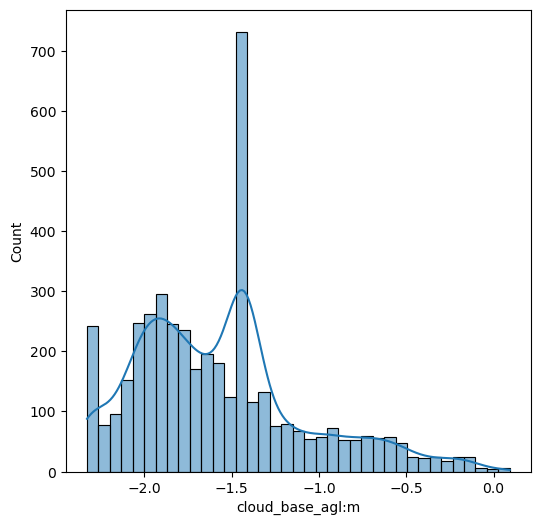

In [113]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X_train_estimated_a_final['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

X_train_estimated_a_final.describe()

(1.1760645, 1.1190307)

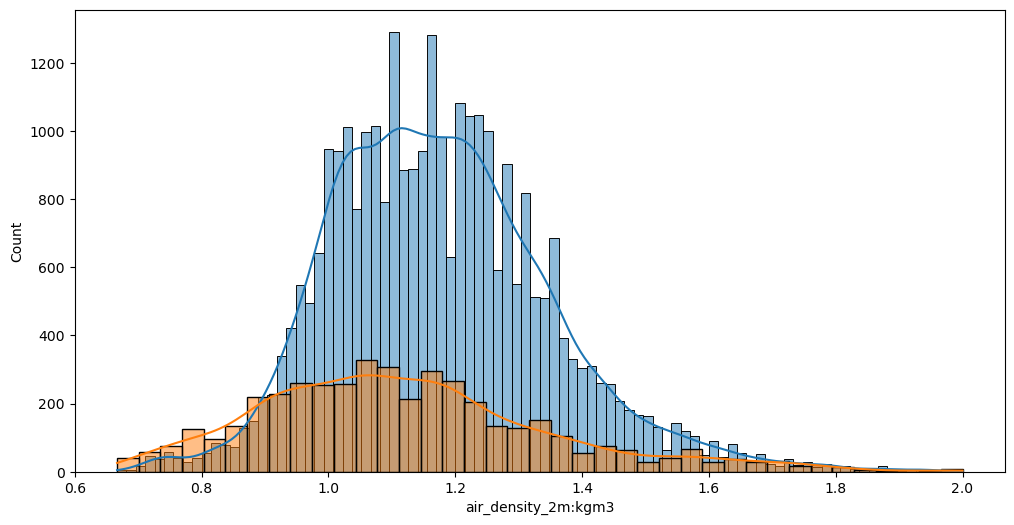

In [114]:
i = 1

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

#sns.histplot(data=X_train_observed_a_est.loc[A_index21_est].iloc[:,i], kde=True)
sns.histplot(data=X_train_observed_a_final.iloc[:,i], kde=True)
sns.histplot(data=X_train_estimated_a_final.iloc[:,i], kde=True)

X_train_observed_a_final.iloc[:,i].mean(), X_train_estimated_a_final.iloc[:,i].mean(), 

In [115]:
def shift(X_obs, X_est):
    mu_obs, sd_obs = X_obs.mean(), np.sqrt(X_obs.var())
    mu_est, sd_est = X_est.mean(), np.sqrt(X_est.var())
    if sd_est>0:
        X_est = (X_est - mu_est) / sd_est
        X_est = (X_est * sd_obs) + mu_obs
        return X_est
    else:
        return X_est

In [116]:
for i in range(X_train_estimated_a_final.shape[1]):
    X_obs, X_est = X_train_observed_a_final.iloc[:,i], X_train_estimated_a_final.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_a_final.iloc[:,i] = X_est_new
    
for i in range(X_train_estimated_b_final.shape[1]):
    X_obs, X_est = X_train_observed_b_final.iloc[:,i], X_train_estimated_b_final.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_b_final.iloc[:,i] = X_est_new
    
for i in range(X_train_estimated_c_final.shape[1]):
    X_obs, X_est = X_train_observed_c_final.iloc[:,i], X_train_estimated_c_final.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_c_final.iloc[:,i] = X_est_new

In [117]:
for i in range(X_test_estimated_a_final.shape[1]):
    X_obs, X_est = X_train_observed_a_final.iloc[:,i], X_test_estimated_a_final.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_test_estimated_a_final.iloc[:,i] = X_est_new

for i in range(X_test_estimated_b_final.shape[1]):
    X_obs, X_est = X_train_observed_b_final.iloc[:,i], X_test_estimated_b_final.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_test_estimated_b_final.iloc[:,i] = X_est_new

for i in range(X_test_estimated_c_final.shape[1]):
    X_obs, X_est = X_train_observed_c_final.iloc[:,i], X_test_estimated_c_final.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_test_estimated_c_final.iloc[:,i] = X_est_new

In [118]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a_scaled = scaler.fit_transform(X_train_estimated_a_final)
X_train_observed_a_scaled = scaler.fit_transform(X_train_observed_a_final)
X_test_estimated_a_scaled = scaler.fit_transform(X_test_estimated_a_final)

X_train_estimated_b_scaled = scaler.fit_transform(X_train_estimated_b_final)
X_train_observed_b_scaled = scaler.fit_transform(X_train_observed_b_final)
X_test_estimated_b_scaled = scaler.fit_transform(X_test_estimated_b_final)

X_train_estimated_c_scaled = scaler.fit_transform(X_train_estimated_c_final)
X_train_observed_c_scaled = scaler.fit_transform(X_train_observed_c_final)
X_test_estimated_c_scaled = scaler.fit_transform(X_test_estimated_c_final)

<Axes: xlabel='cloud_base_agl:m', ylabel='Count'>

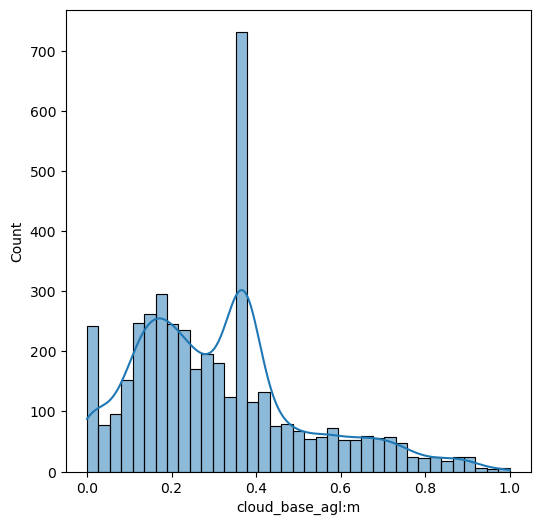

In [122]:
X = pd.DataFrame(X_train_estimated_a_scaled, columns = X_train_estimated_a_final.columns)
X.set_index(X_train_estimated_a_final.index, inplace= True)
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

In [123]:
X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

# Comparaison de modèles : 

# Prédiction sans LR pour la location A

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor(loss='absolute_error', learning_rate=0.01, n_estimators=200, max_depth=5))]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_a, pd.concat([train_a_observed_matched, train_a_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_a_scaled)
    df_pred_a = pd.DataFrame({'prediction' : y_pred})
    df_pred_a.set_index(X_test_estimated_a_final.index, inplace = True)

<Axes: xlabel='time'>

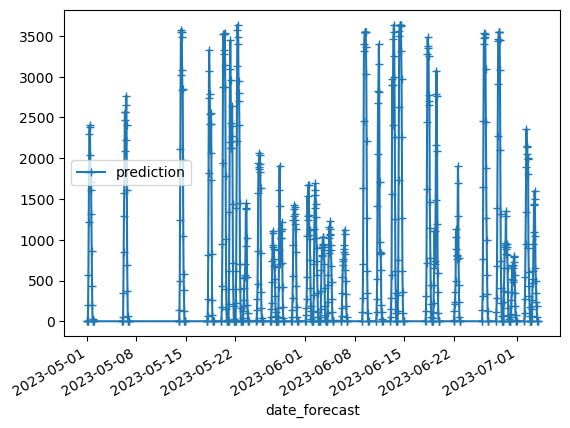

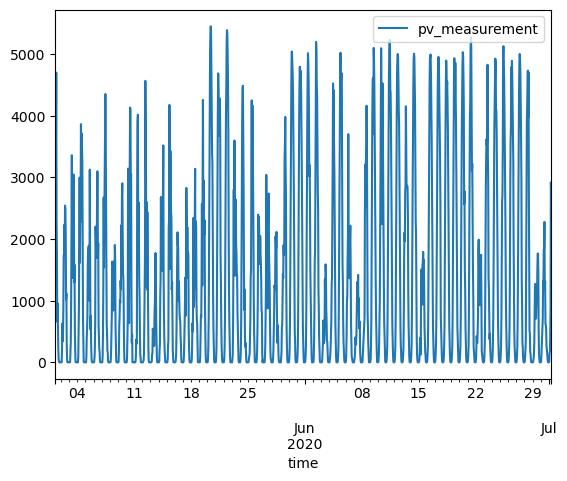

<Figure size 640x480 with 0 Axes>

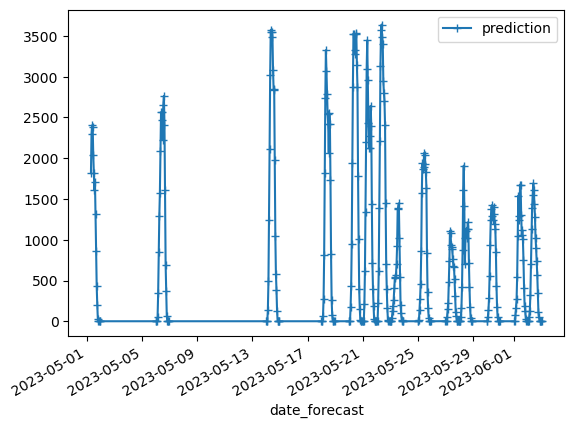

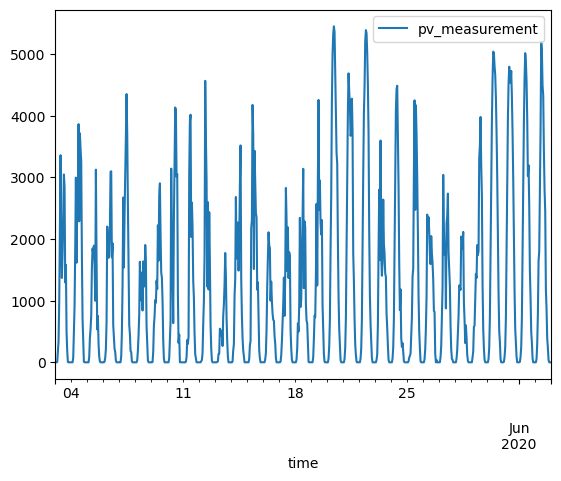

In [161]:
df_pred_a.plot(marker = '+'), train_a['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_a['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [162]:
for date in df_pred_a.index : 
    if df_pred_a.loc[date]['prediction'] < 1.2 :
        df_pred_a.loc[date]['prediction'] = 0

In [163]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,A
1,1,2023-05-01 01:00:00,0.000000,A
2,2,2023-05-01 02:00:00,0.000000,A
3,3,2023-05-01 03:00:00,0.000000,A
4,4,2023-05-01 04:00:00,200.563871,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,184.841078,A
716,716,2023-07-03 20:00:00,53.975224,A
717,717,2023-07-03 21:00:00,3.578476,A
718,718,2023-07-03 22:00:00,0.000000,A


# Prédictions pour la location B

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor(loss='absolute_error', learning_rate=0.01, n_estimators=200, max_depth=5))]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_b, pd.concat([train_b_observed_matched, train_b_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_b_scaled)
    df_pred_b = pd.DataFrame({'prediction' : y_pred})
    df_pred_b.set_index(X_test_estimated_b_final.index, inplace = True)

<Axes: xlabel='time'>

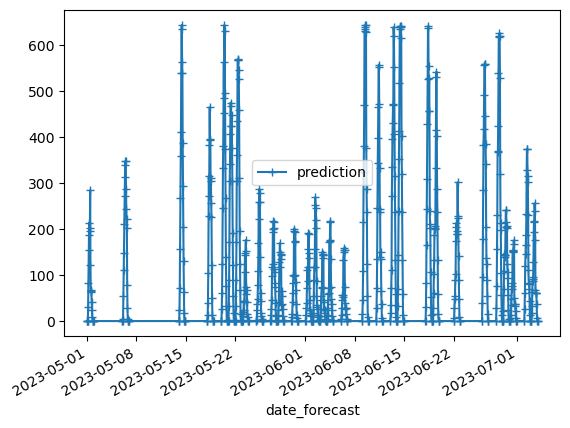

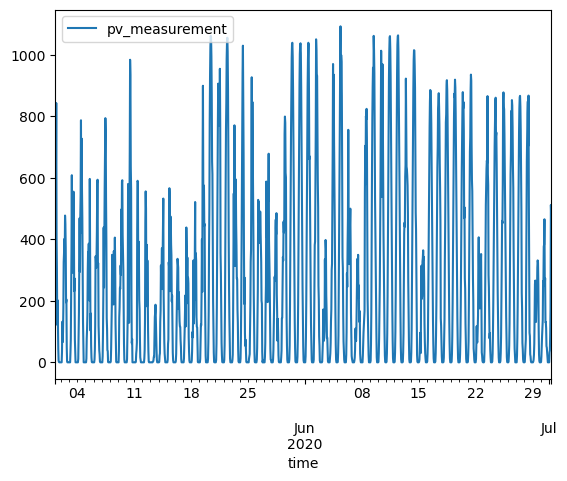

<Figure size 640x480 with 0 Axes>

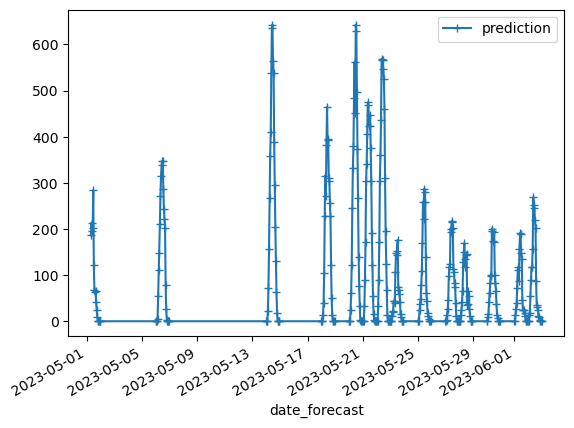

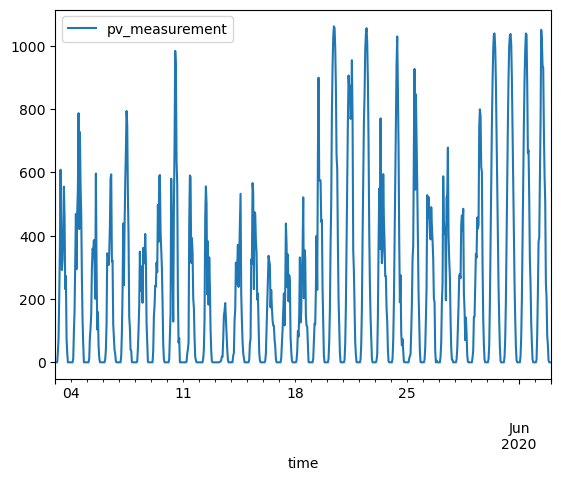

In [165]:
df_pred_b.plot(marker = '+'), train_b['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_b['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [166]:
for date in df_pred_b.index : 
    if df_pred_b.loc[date]['prediction'] < 1.2 :
        df_pred_b.loc[date]['prediction'] = 0

In [167]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,B
1,1,2023-05-01 01:00:00,0.000000,B
2,2,2023-05-01 02:00:00,0.000000,B
3,3,2023-05-01 03:00:00,0.000000,B
4,4,2023-05-01 04:00:00,30.999163,B
...,...,...,...,...
715,715,2023-07-03 19:00:00,37.324335,B
716,716,2023-07-03 20:00:00,7.697550,B
717,717,2023-07-03 21:00:00,0.000000,B
718,718,2023-07-03 22:00:00,0.000000,B


# Prédictions pour la location C


In [168]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor(loss='absolute_error', learning_rate=0.01, n_estimators=200, max_depth=5))]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_c, pd.concat([train_c_observed_matched, train_c_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_c_scaled)
    df_pred_c = pd.DataFrame({'prediction' : y_pred})
    df_pred_c.set_index(X_test_estimated_c_final.index, inplace = True)

<Axes: xlabel='time'>

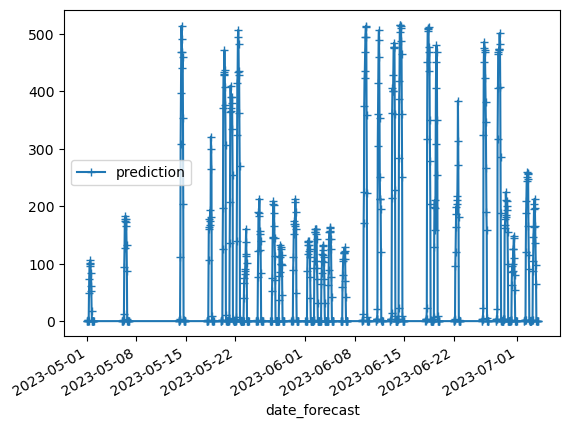

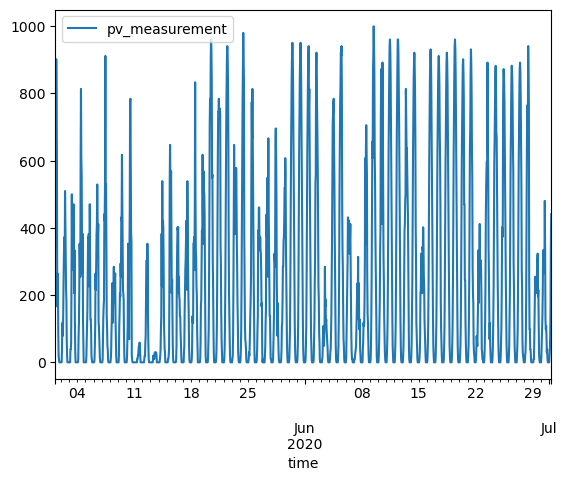

<Figure size 640x480 with 0 Axes>

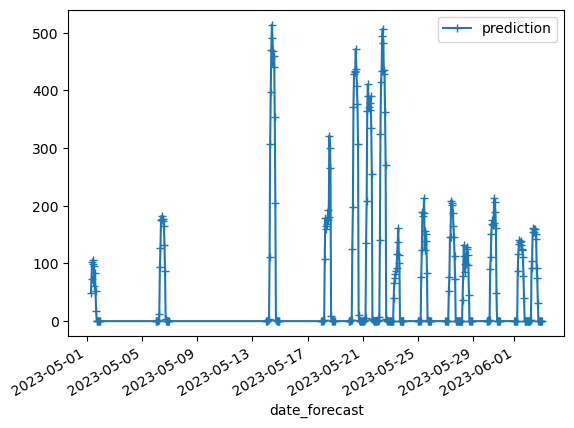

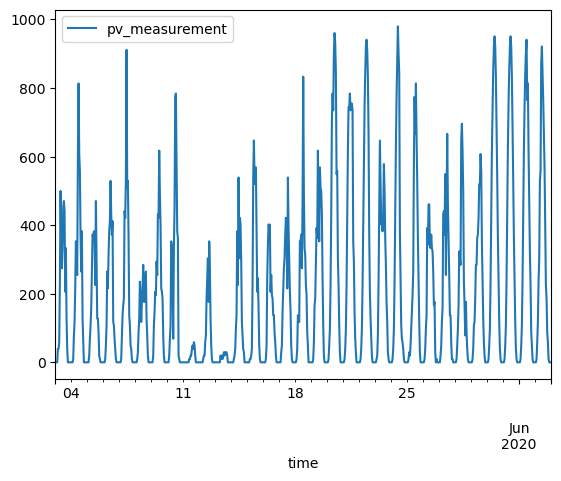

In [169]:
df_pred_c.plot(marker = '+'), train_c['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_c['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()


In [170]:
for date in df_pred_c.index : 
    if df_pred_c.loc[date]['prediction'] < 1.2 :
        df_pred_c.loc[date]['prediction'] = 0

In [171]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,C
1,1,2023-05-01 01:00:00,0.000000,C
2,2,2023-05-01 02:00:00,0.000000,C
3,3,2023-05-01 03:00:00,0.000000,C
4,4,2023-05-01 04:00:00,1.228177,C
...,...,...,...,...
715,715,2023-07-03 19:00:00,0.000000,C
716,716,2023-07-03 20:00:00,0.000000,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,0.000000,C


# Gather all the predictions

In [172]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total
#df_pred_final[0:100]

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,A
1,1,2023-05-01 01:00:00,0.000000,A
2,2,2023-05-01 02:00:00,0.000000,A
3,3,2023-05-01 03:00:00,0.000000,A
4,4,2023-05-01 04:00:00,200.563871,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,0.000000,C
716,716,2023-07-03 20:00:00,0.000000,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,0.000000,C


In [173]:
cd ../marijan

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/marijan


In [174]:
df_pred_final.to_csv('submission_6.csv', index=False)

In [159]:
train_a[0:150]

,pv_measurement
time,
2019-06-02 22:00:00,0.00
2019-06-02 23:00:00,0.00
2019-06-03 00:00:00,0.00
2019-06-03 01:00:00,0.00
2019-06-03 02:00:00,19.36
2019-06-03 03:00:00,251.02
2019-06-03 04:00:00,263.78
2019-06-03 05:00:00,522.72
2019-06-03 06:00:00,904.42
